In [2]:
import numpy as np
import scipy.linalg as la
import math as math
import matplotlib.pyplot as plt
from itertools import chain
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import csv
from matplotlib.legend import Legend

In [40]:
datContent = [i.strip().split() for i in open("./pto-gyrotropic-K_orb_high.dat").readlines()]
values = datContent[1:]
columns = datContent[0]
df = pd.DataFrame(columns = columns)
response_df = df.append(pd.DataFrame(values, 
     columns=columns), 
     ignore_index=True)
response_df = response_df.astype(float)
display(response_df)

ValueError: 11 columns passed, passed data had 12 columns

In [ ]:
datContent = [i.strip().split() for i in open("./pto-gyrotropic-K_spin_high.dat").readlines()]
values = datContent[1:]
columns = datContent[0]
df = pd.DataFrame(columns = columns)
response_df = df.append(pd.DataFrame(values, 
     columns=columns), 
     ignore_index=True)
response_df = response_df.astype(float)
display(response_df)

## Get Response for the $+k$ crystals structure

In [3]:
datContent = [i.strip().split() for i in open("./pto-gyrotropic-K_orb.dat").readlines()]
values = datContent[1:]
columns = datContent[0]
df = pd.DataFrame(columns = columns)
response_df = df.append(pd.DataFrame(values, 
     columns=columns), 
     ignore_index=True)
response_df = response_df.astype(float)
display(response_df)

,EFERMI(eV),omega(eV),xx,yy,zz,xy,xz,yz,x,y,z
0,7.880,0.0,7.721690e-17,-4.581360e-17,-1.655320e-18,-1.235350e-17,-1.317790e-15,1.318910e-15,1.289970e-15,1.283940e-15,-1.799150e-13
1,7.885,0.0,1.089120e-15,-6.051010e-16,-2.756410e-17,-2.216250e-16,-2.214850e-14,2.214610e-14,2.162700e-14,2.156010e-14,-2.930310e-12
2,7.890,0.0,9.754640e-15,-5.024620e-15,-2.977390e-16,-2.544770e-15,-2.388260e-13,2.383940e-13,2.322390e-13,2.321060e-13,-3.051740e-11
3,7.895,0.0,5.793140e-14,-2.784400e-14,-2.146970e-15,-1.990290e-14,-1.701180e-12,1.693610e-12,1.644200e-12,1.649340e-12,-2.090870e-10
4,7.900,0.0,2.500980e-13,-1.213350e-13,-1.071400e-14,-1.178370e-13,-8.332650e-12,8.264700e-12,7.989320e-12,8.053870e-12,-9.808350e-10
5,7.905,0.0,9.228240e-13,-5.435020e-13,-3.862250e-14,-5.781370e-13,-2.945980e-11,2.908560e-11,2.798840e-11,2.837770e-11,-3.310530e-09
6,7.910,0.0,3.284040e-12,-2.540690e-12,-1.054310e-13,-2.283900e-12,-7.901330e-11,7.763790e-11,7.439740e-11,7.585720e-11,-8.469580e-09
7,7.915,0.0,1.037680e-11,-9.609330e-12,-2.281830e-13,-6.513250e-12,-1.683090e-10,1.647310e-10,1.572960e-10,1.610620e-10,-1.723080e-08
8,7.920,0.0,2.482670e-11,-2.507800e-11,-4.084130e-13,-1.236870e-11,-2.980570e-10,2.910610e-10,2.770370e-10,2.842880e-10,-2.920320e-08
9,7.925,0.0,4.095700e-11,-4.278780e-11,-6.320270e-13,-1.539810e-11,-4.606560e-10,4.496380e-10,4.265960e-10,4.379930e-10,-4.330930e-08


In [4]:
def get_response_df(df):
    k_xx = df["xx"]
    k_yy = df["yy"]
    k_zz = df["zz"]

    k_xy = df["xy"] + df["z"]
    k_yx = df["xy"] - df["z"]
    k_xy = k_xy.rename('xy')
    k_yx = k_yx.rename('yx')


    k_xz = df["xz"] + df["y"]
    k_zx = df["xz"] - df["y"]
    k_xz = k_xz.rename('xz')
    k_zx = k_zx.rename('zx')

    k_yz = df["yz"] + df["x"]
    k_zy = df["yz"] - df["x"]
    k_zy = k_zy.rename('zy')
    k_yz = k_yz.rename('yz')

    df=pd.concat([k_xx,k_yy, k_zz, k_xy, k_yx, k_xz, k_zx, k_yz, k_zy], axis=1)

    return df



def get_response_matrix_slice(df_slice):
    ## This returns the matrix for a given energy value
    
    k_xx = df_slice["xx"]
    k_yy = df_slice["yy"]
    k_zz = df_slice["zz"]

    k_xy = df_slice["xy"] + df_slice["z"]
    k_yx = df_slice["xy"] - df_slice["z"]

    k_xz = df_slice["xz"] + df_slice["y"]
    k_zx = df_slice["xz"] - df_slice["y"]

    k_yz = df_slice["yz"] + df_slice["x"]
    k_zy = df_slice["yz"] - df_slice["x"]

    matrix = np.zeros((3,3), dtype = complex)

    matrix[0,0] = k_xx
    matrix[0,1] = k_xy
    matrix[0,2] = k_xz
    matrix[1,0] = k_yx
    matrix[1,1] = k_yy
    matrix[1,2] = k_yz
    matrix[2,0] = k_zx
    matrix[2,1] = k_zy
    matrix[2,2] = k_zz

    return matrix


# get_response_df(response_df)



In [5]:
def plot_response(component, crystal_structure_title, response_df): 
    energies = response_df["EFERMI(eV)"] 
    response = get_response_df(response_df)["{}".format(component)]

    st = sns.axes_style("ticks")
    sns.set(style = st,palette = sns.color_palette("muted"), rc={'figure.figsize': (10,8)})
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.sans-serif": ["Computer Modern Roman"]})

    fig, ax = plt.subplots()
    fontSize = 20
    ticksize = 20
    plt.ylabel(r'${}$'.format(component), fontsize = fontSize)
    plt.xlabel(r'Energy (eV)',fontsize = fontSize)
    #heatmap = ax.imshow(mag_grid, cmap = 'afmhot')
    plt.plot(energies, response)

    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize)
    plt.tick_params(axis='both', which='major', labelsize=ticksize)

    ax.legend()
    plt.savefig("response_{}_{}.pdf".format(crystal_structure_title,component))
    plt.show()

No handles with labels found to put in legend.


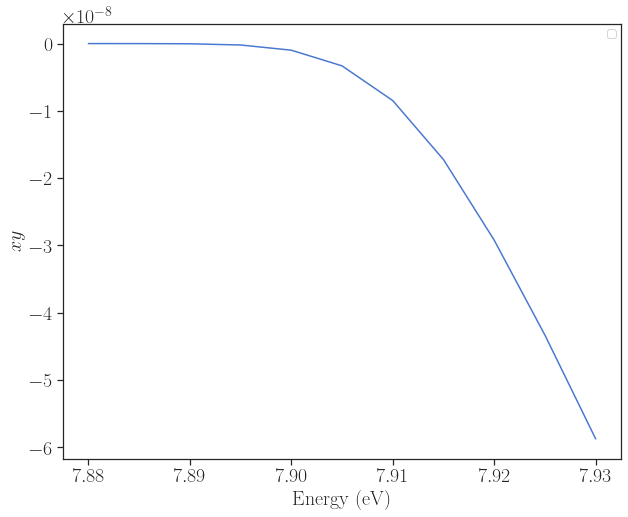

No handles with labels found to put in legend.


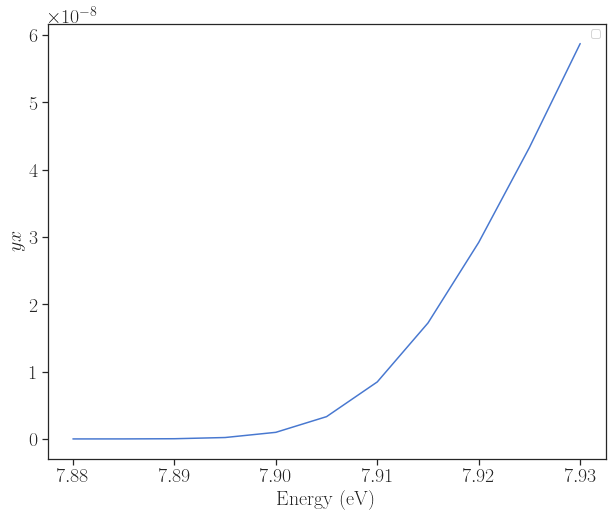

In [23]:
plot_response(component="xy", crystal_structure_title= "k", response_df=response_df)
plot_response(component="yx", crystal_structure_title= "k", response_df=response_df)

No handles with labels found to put in legend.


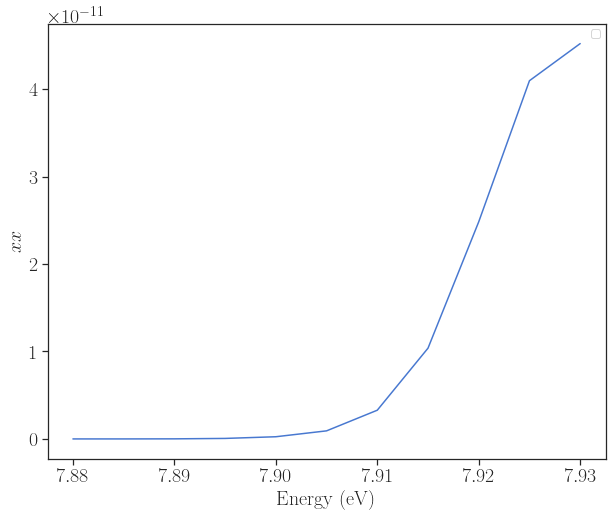

No handles with labels found to put in legend.


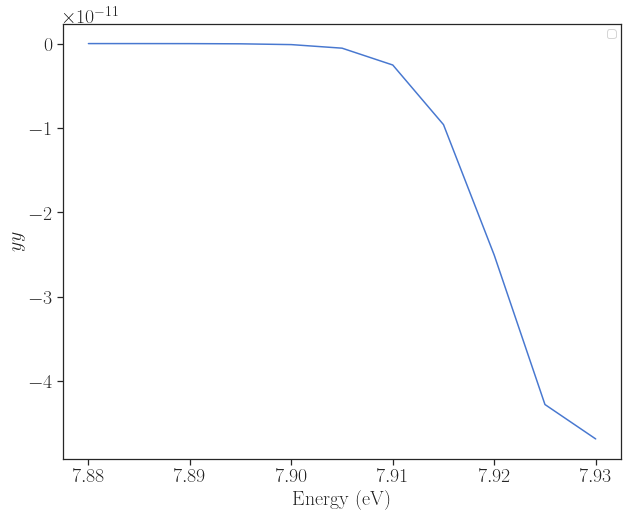

In [46]:
plot_response(component="xx", crystal_structure_title= "k", response_df=response_df)
plot_response(component="yy", crystal_structure_title= "k", response_df=response_df)

### Show spin contribution vs orbital magnetic contribution

In [6]:
datContent = [i.strip().split() for i in open("./pto-gyrotropic-K_spin.dat").readlines()]
values = datContent[1:]
columns = datContent[0]
df = pd.DataFrame(columns = columns)
response_df_spin = df.append(pd.DataFrame(values, 
     columns=columns), 
     ignore_index=True)
response_df_spin = response_df_spin.astype(float)
# display(response_df_spin)

In [7]:
get_response_df(response_df_spin)

,xx,yy,zz,xy,yx,xz,zx,yz,zy
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### Sayantika Spin contribution

,EFERMI(eV),omega(eV),xx,yy,zz,xy,xz,yz,x,y,z
0,7.800,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,7.805,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,7.810,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,7.815,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,7.820,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,7.825,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,7.830,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,7.835,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,7.840,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,7.845,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


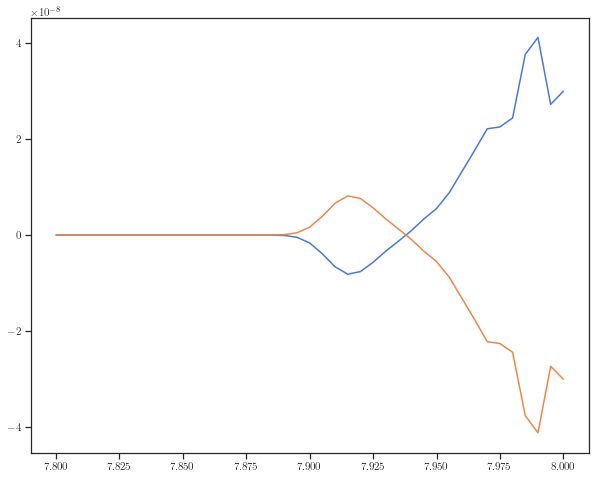

In [106]:
datContent = [i.strip().split() for i in open("./pto-gyrotropic-K_spin-say.dat").readlines()]
values = datContent[1:]
columns = datContent[0]
df = pd.DataFrame(columns = columns)
response_df_spin_say = df.append(pd.DataFrame(values, 
     columns=columns), 
     ignore_index=True)
response_df_spin_say = response_df_spin.astype(float)
display(response_df_spin)

energies = response_df_spin_say["EFERMI(eV)"]

component_response_spin_say = get_response_df(response_df_spin_say)
# display(component_response_spin_say)

component = component_response_spin_say["yx"]
component2= component_response_spin_say["xy"]
plt.plot(energies,component)
plt.plot(energies,component2)

In [8]:
def plot_spin_orb(response_df, response_df_spin):

    colors = ['r', 'g', 'b']
    
    energies_spin = response_df_spin["EFERMI(eV)"] 
    energies = response_df["EFERMI(eV)"] 

    response_spin_xy = get_response_df(response_df_spin)["{}".format("xy")]
    response_xy = get_response_df(response_df)["{}".format("xy")]
    response_spin_yx = get_response_df(response_df_spin)["{}".format("yx")]
    response_yx = get_response_df(response_df)["{}".format("yx")]

    st = sns.axes_style("ticks")
    sns.set(style = st,palette = sns.color_palette("muted"), rc={'figure.figsize': (10,8)})
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.sans-serif": ["Computer Modern Roman"]})

    fig, ax = plt.subplots()
    fontSize = 20
    ticksize = 20
    plt.ylabel(r'$k_{ij}$ [Amp]', fontsize = fontSize)
    plt.xlabel(r'$E - E_F$ [eV]',fontsize = fontSize)
    #heatmap = ax.imshow(mag_grid, cmap = 'afmhot')
    plt.plot(energies, response_xy, label = r'$m_l$ for $k_{xy}$', color = 'r', marker = '.')
    plt.plot(energies, response_yx, label = r'$m_l$ for $k_{yx}$', color = 'b', marker = '.')
    plt.plot(energies_spin, response_spin_xy, label = r'$m_s$ for $k_{xy}$', linestyle = '--', color = 'r')
    plt.plot(energies_spin, response_spin_yx, label = r'$m_s$ for $k_{yx}$', linestyle = '--', color = 'b')


    datContent = [i.strip().split() for i in open("./pto-gyrotropic-DOS_+k.dat").readlines()]
    values = datContent[1:]
    columns = datContent[0]
    df = pd.DataFrame(columns = columns)
    df_dos = df.append(pd.DataFrame(values, 
        columns=columns), 
        ignore_index=True)
    df_dos = df_dos.astype(float)
    display(df_dos)

    dos = df_dos["EFERMI(eV)"]*1e-4
    energies_dos = df_dos["#"]


    # plt.plot(energies_dos, dos, label = 'dos', marker = '.')
    null = [0 for i in energies]
    plt.plot(energies, null, color = 'g', label = r'$m_l$ for $k_{xy} \; \&  \;k_{yx}$')


    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize)
    plt.tick_params(axis='both', which='major', labelsize=ticksize)
#
    ax.set_xlim(7.890, 7.93)
    # ax.set_xlim(7.890, 7.9)
    # ax.set_ylim(-0.1e-7, 0.1e-7)
    ax.legend(fontsize=ticksize)

    

    plt.savefig("response_combined.pdf")
    plt.show()

,#,EFERMI(eV)
0,7.880,1.089530e-08
1,7.885,1.746210e-07
2,7.890,1.766560e-06
3,7.895,1.153790e-05
4,7.900,5.034630e-05
5,7.905,1.539430e-04
6,7.910,3.494540e-04
7,7.915,6.246540e-04
8,7.920,9.287690e-04
9,7.925,1.211630e-03


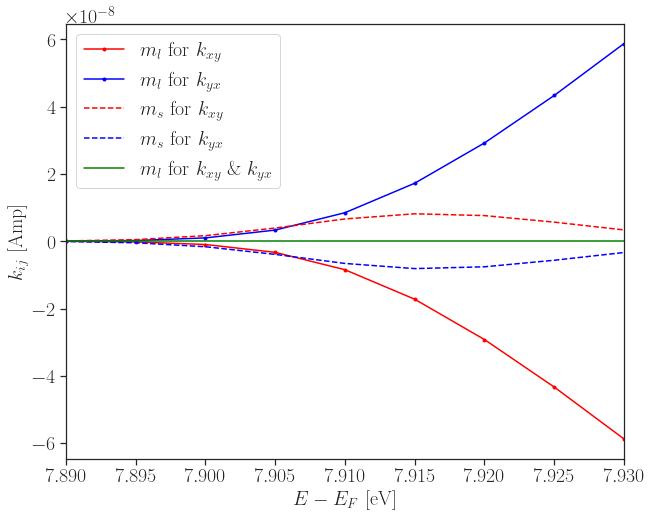

In [9]:
plot_spin_orb(response_df=response_df, response_df_spin= response_df_spin)

## Response for $-k$ electric dipole

In [47]:
datContent = [i.strip().split() for i in open("./pto-gyrotropic-K_orb-(minus).dat").readlines()]
values = datContent[1:]
columns = datContent[0]
df = pd.DataFrame(columns = columns)
response_df = df.append(pd.DataFrame(values, 
     columns=columns), 
     ignore_index=True)
response_df_minus = response_df.astype(float)
display(response_df_minus)

,EFERMI(eV),omega(eV),xx,yy,zz,xy,xz,yz,x,y,z
0,7.880,0.0,1.255230e-14,-1.246790e-14,5.406170e-18,6.409070e-18,-8.461360e-15,8.419710e-15,8.572580e-15,8.610000e-15,1.115590e-12
1,7.885,0.0,1.353260e-13,-1.342590e-13,6.426920e-17,1.543610e-17,-1.067590e-13,1.063200e-13,1.078790e-13,1.082750e-13,1.358470e-11
2,7.890,0.0,8.616760e-13,-8.531650e-13,4.937400e-16,-4.300220e-16,-8.781230e-13,8.752430e-13,8.842330e-13,8.868580e-13,1.076770e-10
3,7.895,0.0,3.134230e-12,-3.090550e-12,2.516960e-15,-5.494290e-15,-4.882260e-12,4.870330e-12,4.895180e-12,4.906290e-12,5.757990e-10
4,7.900,0.0,5.906840e-12,-5.758780e-12,8.790140e-15,-3.298030e-14,-1.922230e-11,1.919100e-11,1.918380e-11,1.921400e-11,2.175840e-09
5,7.905,0.0,3.336010e-12,-2.990000e-12,2.182690e-14,-1.238670e-13,-5.640850e-11,5.635840e-11,5.605300e-11,5.610540e-11,6.117330e-09
6,7.910,0.0,-7.158300e-12,7.757950e-12,4.029850e-14,-3.256020e-13,-1.295300e-10,1.294930e-10,1.282740e-10,1.283240e-10,1.343900e-08
7,7.915,0.0,-1.504060e-11,1.590500e-11,5.861160e-14,-6.475900e-13,-2.437660e-10,2.438070e-10,2.407980e-10,2.407910e-10,2.415960e-08
8,7.920,0.0,-8.834370e-12,1.001450e-11,7.223320e-14,-1.046620e-12,-3.947900e-10,3.949840e-10,3.891730e-10,3.890420e-10,3.733020e-08
9,7.925,0.0,9.851160e-12,-8.217030e-12,8.105520e-14,-1.468720e-12,-5.759580e-10,5.763810e-10,5.666110e-10,5.662840e-10,5.199460e-08


No handles with labels found to put in legend.


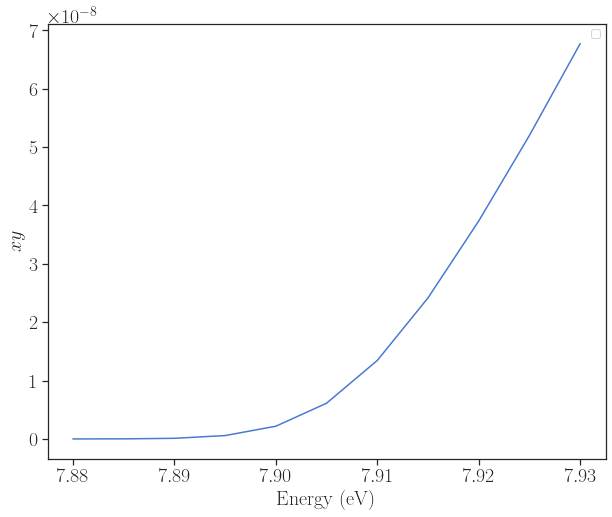

No handles with labels found to put in legend.


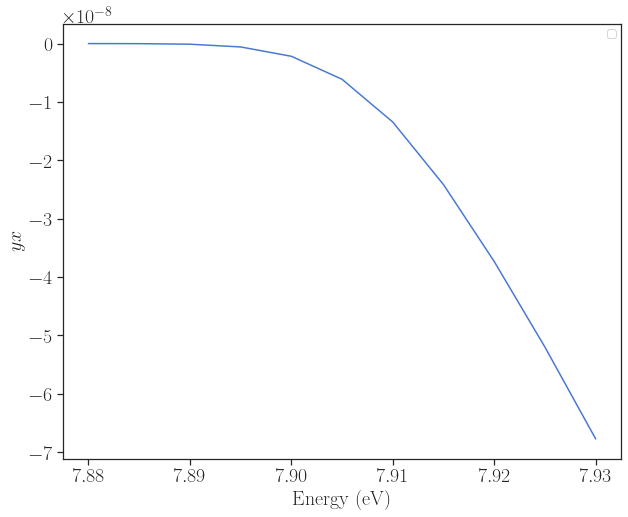

In [48]:
#plot_response(component="xx", crystal_structure_title= "-k", response_df=response_df)
plot_response(component="xy", crystal_structure_title= "-k", response_df=response_df_minus)
plot_response(component="yx", crystal_structure_title= "-k", response_df=response_df_minus)

No handles with labels found to put in legend.


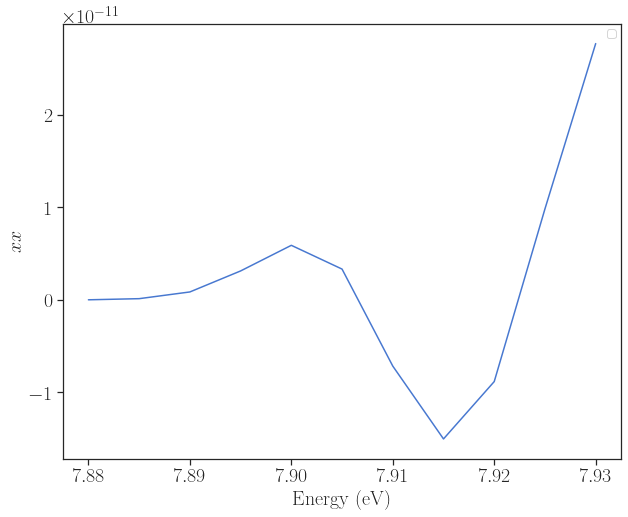

No handles with labels found to put in legend.


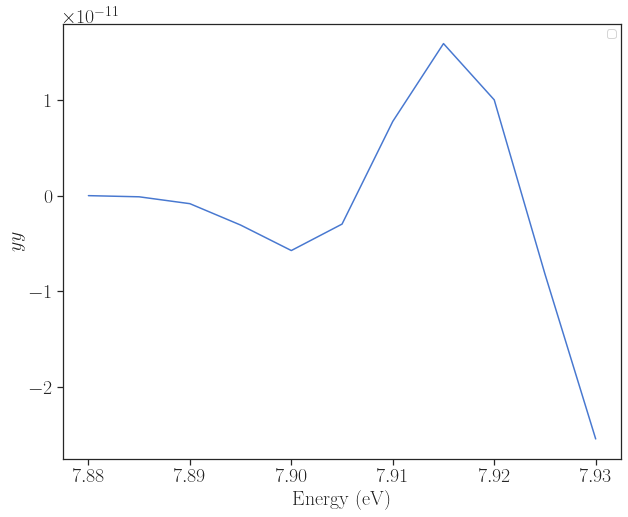

In [49]:
plot_response(component="xx", crystal_structure_title= "-k", response_df=response_df_minus)
plot_response(component="yy", crystal_structure_title= "-k", response_df=response_df_minus)

In [92]:
def import_response_data(filename):
    datContent = [i.strip().split() for i in open("./{}".format(filename)).readlines()]
    values = datContent[1:]
    columns = datContent[0]
    df = pd.DataFrame(columns = columns)
    response_df = df.append(pd.DataFrame(values, columns=columns), ignore_index=True)
    response_df = response_df.astype(float)
    return response_df


def get_plot_info(response_df, component):
    energies = response_df["EFERMI(eV)"] 
    response = get_response_df(response_df)["{}".format(component)]
    return energies, response


def conv_to_magn(e_field, tau, response):
    conv_factor_amp_bohr = (10**4)/9.27
    const_prefactor = (1.602*10**(-19)*tau*conv_factor_amp_bohr)/(1.05457*10**(-34))
    # print("Constant prefactor: {}".format(const_prefactor))
    response_refactored = const_prefactor*response
    # print(response_refactored)
    magnetization = e_field*response_refactored
 
    return magnetization


def get_combined_response_plot():
    response_df = import_response_data("pto-gyrotropic-K_orb.dat")
    response_df_spin = import_response_data("pto-gyrotropic-K_spin.dat")

    tau = 10**(-11)
    e_field = 10**(-6)


    response_spin_xy = get_response_df(response_df_spin)["{}".format("xy")]
    response_spin_yx = get_response_df(response_df_spin)["{}".format("yx")]

    
    # response_df_minus = import_response_data("pto-gyrotropic-K_orb-k.dat")
    #response_df_cubic = import_response_data("pto-gyrotropic-K_orb-cubic.dat") 



    # fermi_energy = 7.8986
    fermi_energy = 7.890

    energies_k = response_df["EFERMI(eV)"] - fermi_energy
    energies_spin = response_df_spin["EFERMI(eV)"] - fermi_energy
    # energies_minus = response_df_minus["EFERMI(eV)"] 

    response_xy = get_response_df(response_df)["xy"]
    response_yx = get_response_df(response_df)["yx"]
    # response_xy_minus = get_response_df(response_df_minus)["xy"]
    # response_yx_minus = get_response_df(response_df_minus)["yx"]

    cubic = energies_k*0

    st = sns.axes_style("ticks")
    sns.set(style = st,palette = sns.color_palette("muted"), rc={'figure.figsize': (10,8)})
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.sans-serif": ["Computer Modern Roman"]})

    fig, ax = plt.subplots()
    fontSize = 20
    ticksize = 20

    plt.ylabel(r'$k_{ij}$ [Amp]', fontsize = fontSize)
    plt.xlabel(r'$E - E_F$ [eV]',fontsize = fontSize)
    #heatmap = ax.imshow(mag_grid, cmap = 'afmhot')

    plt.plot(energies_k, response_xy, color = 'r', label = r'$m_l$ for $k_{xy}$')
    plt.plot(energies_k, response_yx, color = 'b', label = r'$m_l$ for $k_{yx}$')
    plt.plot(energies_spin, response_spin_xy, color = 'r', label = r'$m_s$ for $k_{xy}$', linestyle = '--')
    plt.plot(energies_spin, response_spin_yx, color = 'b', label = r'$m_s$ for $k_{yx}$', linestyle = '--')
    # plt.plot(energies_minus, response_xy_minus, color = 'r', label = r'$k_{xy}$', linestyle = '--')
    # plt.plot(energies_minus, response_yx_minus, color = 'b', label = r'$k_{yx}$', linestyle = '--')
    plt.plot(energies_k, cubic, color = 'g', label = r'$m_s$ \& $m_l$ for $k_{xy} \; \& \; k_{yx}$')


    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize)
    plt.tick_params(axis='both', which='major', labelsize=ticksize)


    # leg = Legend(ax,[test_1, test_2], ['line C', 'line D'],
    #          loc='lower right', frameon=False)
    # ax.add_artist(leg)
    # ax.set_xlim(7.895, 7.93)
    ax.set_xlim(0, 0.03)
    # ax.legend()
    # ax.legend(fontsize=ticksize)

    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

    mag_xy = [conv_to_magn(e_field, tau, i) for i in response_xy]
    mag_yx = [conv_to_magn(e_field, tau, i) for i in response_yx]
    mag_xy_spin = [conv_to_magn(e_field, tau, i) for i in response_spin_xy]
    mag_yx_spin = [conv_to_magn(e_field, tau, i) for i in response_spin_yx]
    # print(mag_yx)

    # PLOT THE SECOND CONTRIBUTION (Y_AXIS representing the MAGNETIZATION)

    color = 'tab:blue'
    ax2.set_ylabel(r'Magnetization [$\mu_B \AA^{-3}]$', color=color, fontsize = fontSize )  
    ax2.plot(energies_k, mag_xy , color = 'r' , marker = '.', linestyle = '-.')
    ax2.plot(energies_k, mag_yx , color = 'b' , marker = '.', linestyle = '-.')
    ax2.plot(energies_spin, mag_xy_spin , color = 'r' , marker = '.', linestyle = '-.')
    ax2.plot(energies_spin, mag_yx_spin , color = 'b' , marker = '.', linestyle = '-.')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.tick_params(axis='both', which='major', labelsize=ticksize)
    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize) 

    ax.legend(fontsize=ticksize)
    # plt.savefig("DOS_{}.pdf".format(title))

    plt.tight_layout()
    plt.savefig("response_combined_mu_bohr.pdf")
    plt.show()


In [93]:
conv_to_magn(10**(-6),1e-11, 0.5e7)

81936492.58967282

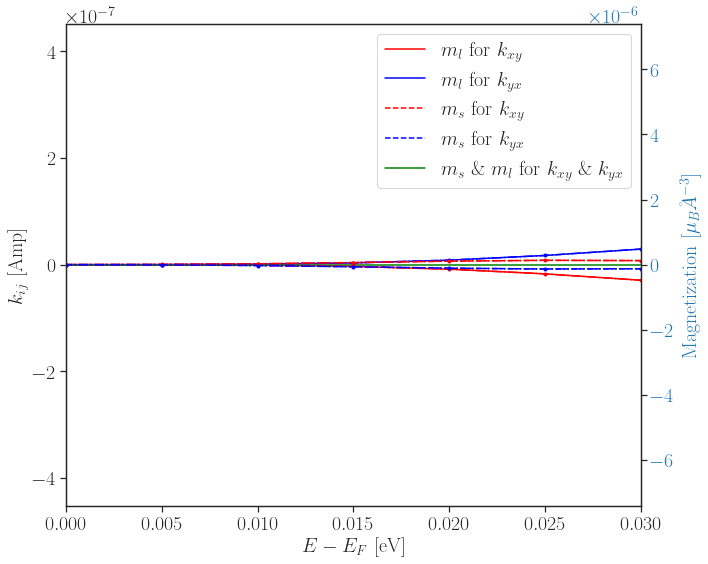

In [94]:
get_combined_response_plot()

### Create Combined plot with higher energy ranges

In [95]:
response_df = import_response_data("pto-gyrotropic-K_orb.dat")
response_df_spin = import_response_data("pto-gyrotropic-K_spin.dat")

response_df_high = import_response_data("pto-gyrotropic-K_orb_high.dat")
response_df_spin_high = import_response_data("pto-gyrotropic-K_spin_high.dat")

combined_response_df = pd.concat([response_df, response_df_high], ignore_index= True)
combined_response_df.drop([11], inplace = True, axis = 0)


combined_response_df_spin = pd.concat([response_df_spin, response_df_spin_high], ignore_index= True)
combined_response_df_spin.drop([15], inplace = True, axis = 0)

display(combined_response_df)
display(combined_response_df_spin)

,EFERMI(eV),omega(eV),xx,yy,zz,xy,xz,yz,x,y,z
0,7.800,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,7.805,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,7.810,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,7.815,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,7.820,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,7.825,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,7.830,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,7.835,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,7.840,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,7.845,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


,EFERMI(eV),omega(eV),xx,yy,zz,xy,xz,yz,x,y,z
0,7.800,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,7.805,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,7.810,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,7.815,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,7.820,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,7.825,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,7.830,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,7.835,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,7.840,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,7.845,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [96]:
st = sns.axes_style("ticks")
sns.set(style = st,palette = sns.color_palette("muted"), rc={'figure.figsize': (10,8)})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})

In [97]:
def get_combined_response_plot_higher(df_orb, df_spin, tau, e_field):

    # tau = 10**(-11)
    # e_field = 10**(-6)

    fermi_energy = 7.890
    # fermi_energy = 0

    response_spin_xy = get_response_df(df_spin)["{}".format("xy")]
    response_spin_yx = get_response_df(df_spin)["{}".format("yx")]
    

    response_xy = get_response_df(df_orb)["xy"]
    response_yx = get_response_df(df_orb)["yx"]


    energies_orb = df_orb["EFERMI(eV)"] - fermi_energy
    energies_spin = df_spin["EFERMI(eV)"] - fermi_energy

    fig, ax = plt.subplots()

    fontSize = 20
    ticksize = 20

    plt.ylabel(r'$k_{ij}$ [Amp]', fontsize = fontSize)
    plt.xlabel(r'$E - E_F$ [eV]',fontsize = fontSize)
    #heatmap = ax.imshow(mag_grid, cmap = 'afmhot')

    plt.plot(energies_orb, response_xy, color = 'r', label = r'$m_l$ for $k_{xy}$')
    plt.plot(energies_orb, response_yx, color = 'b', label = r'$m_l$ for $k_{yx}$')
    plt.plot(energies_spin, response_spin_xy, color = 'r', label = r'$m_s$ for $k_{xy}$', linestyle = '--')
    plt.plot(energies_spin, response_spin_yx, color = 'b', label = r'$m_s$ for $k_{yx}$', linestyle = '--')

    # plt.plot(energies_orb, cubic, color = 'g', label = r'$m_s$ \& $m_l$ for $k_{xy} \; \& \; k_{yx}$')


    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize)
    plt.tick_params(axis='both', which='major', labelsize=ticksize)


    ax.set_xlim(0, 0.09)

    # conv_to_nm3 = 1000
    conv_to_nm3 = 0

    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

    mag_xy = [conv_to_magn(e_field, tau, i)*conv_to_nm3 for i in response_xy]
    mag_yx = [conv_to_magn(e_field, tau, i)*conv_to_nm3 for i in response_yx]
    mag_xy_spin = [conv_to_magn(e_field, tau, i)*conv_to_nm3 for i in response_spin_xy]
    mag_yx_spin = [conv_to_magn(e_field, tau, i)*conv_to_nm3 for i in response_spin_yx]

    # PLOT THE SECOND CONTRIBUTION (Y_AXIS representing the MAGNETIZATION)

    color = 'tab:blue'
    ax2.set_ylabel(r'Magnetization [$\mu_B$ nm$^{-3}]$', color=color, fontsize = fontSize )  
    ax2.plot(energies_orb, mag_xy , color = 'r' , marker = '.', linestyle = '-.')
    ax2.plot(energies_orb, mag_yx , color = 'b' , marker = '.', linestyle = '-.')
    ax2.plot(energies_spin, mag_xy_spin , color = 'r' , marker = '.', linestyle = '-.')
    ax2.plot(energies_spin, mag_yx_spin , color = 'b' , marker = '.', linestyle = '-.')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.tick_params(axis='both', which='major', labelsize=ticksize)
    text = plt.gca().yaxis.get_offset_text()
    text.set_size(ticksize) 

    ax.legend(fontsize=ticksize)
    # plt.savefig("DOS_{}.pdf".format(title))

    plt.tight_layout()
    plt.savefig("response_combined_mu_bohr_higher.pdf")
    plt.show()


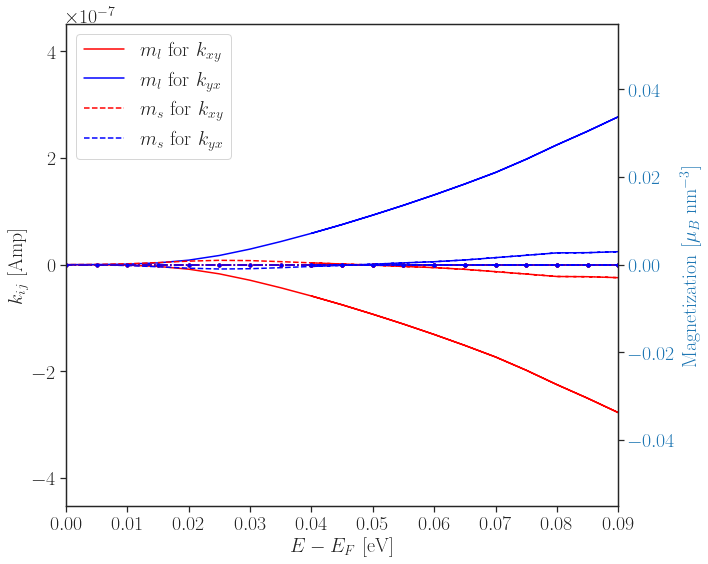

In [98]:
get_combined_response_plot_higher(combined_response_df, combined_response_df_spin, tau= 10**(-11), e_field = 10**(-6))